In [8]:
from sklearn.externals import joblib 
import numpy as np
import pandas as pd

In [9]:
mj = joblib.load('model_joblib')

In [10]:
mj.predict([[5000]])

array([859554.79452055])

# Dummy Variables and One Hot Function

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Township.csv')
print(df.shape)
df.head(13)

(13, 3)


,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [3]:
# Creating dummy variables i.e categorical variables/columns
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
# Merging both the columns together but now we need to drop the main town column from the merged table
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [5]:
final = merged.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [8]:
# Now Calculating the regression model for the given dataset 
# Thus we will again use the Fit() function of sklear.LinearRegression

from sklearn import linear_model


In [9]:
X = final.drop(['price'],axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [13]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [14]:
# Training the datat model using the fit() function
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#predicting where area = '5000' and township = 'west windsor'
model.predict([[5000,0,0]])

array([884277.57471508])

#### To check the accuracy of the model we can simply use the score function of the linear_model module: 
#### model.score() 

In [18]:
# This shows that the model built is 95% accurate!
model.score(X,y)

0.9573929037221873

# Exercise :- 
# Building model for calculating 'Price' of cars based on Model-Mileage-Age of the cars.
### Linear Regerssion using dummy variables.

In [75]:
data = pd.read_csv('CarPrice.csv')
print(data.shape)
data.head(13)

(13, 4)


,Car_Model,Mileage,Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [139]:
%matplotlib inline
# To change the color of the background we can use the following code :  
#plt.rcParams["axes.facecolor"]=('white')
from sklearn import linear_model
model = linear_model.LinearRegression()

In [140]:
A = data['Mileage'].values.astype(int)
B = data['Price'].values.astype(int)
print(A,B)

[69000 35000 57000 22500 46000 59000 52000 72000 91000 67000 83000 79000
 59000] [18000 34000 26100 40000 31500 29400 32000 19300 12000 22000 20000 21000
 33000]


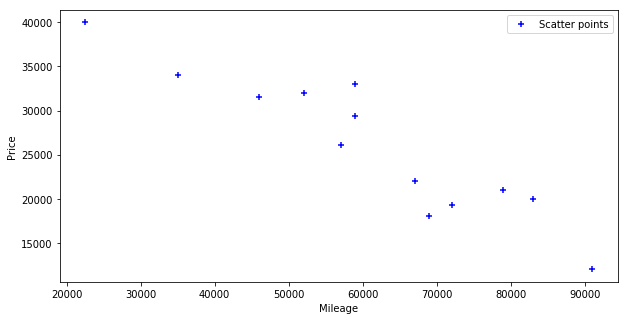

In [141]:
plt.rcParams['figure.figsize'] = (10.0,5.0)
plt.scatter(A,B,color = 'blue',marker = '+', label = "Scatter points")
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()

## From the above plot we can see that Linear Regression is possible for the given data
### Thus we finally build the model for the given data : 

In [142]:
# Now We will v=build the model for the entire data set
# first we will require to create nominal i.e. dummy variables
dummy = pd.get_dummies(data.Car_Model)
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [143]:
# This is the final prorperly categorized dataset 
X = data.drop(['Car_Model'],axis='columns')
sfinal = pd.concat([X,dummy],axis ='columns')
sfinal

,Mileage,Price,Age,Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [144]:
final = sfinal.drop(['Price','Mercedez Benz C class'],axis = 'columns')
final

,Mileage,Age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [145]:
i = sfinal.Price
i

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Price, dtype: int64

In [146]:
model.fit(final,i)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [147]:
model.predict([[60000,5,0,0]])

array([30107.03216718])

In [151]:
model.predict([[15000,2,1,0]])

array([48306.34656023])

In [152]:
# Finally we check the accuracy of our model using score() method
model.score(final,i)

0.9417050937281083

### This shows that our model has the accuracy of 94.17%